4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/20
1875/1875 [==============================] - 324s 170ms/step - loss: 0.4508 - accuracy: 0.8351 - val_loss: 0.3622 - val_accuracy: 0.8716
Epoch 2/20
1875/1875 [==============================] - 298s 159ms/step - loss: 0.3022 - accuracy: 0.8896 - val_loss: 0.2947 - val_accuracy: 0.8953
Epoch 3/20
1875/1875 [==============================] - 295s 157ms/step - loss: 0.2594 - accuracy: 0.9035 - val_loss: 0.2782 - val_accuracy: 0.8979
Epoch 4/20
1875/1875 [==============================] - 287s 153ms/step - loss: 0.2267 - accuracy: 0.9154 - val_loss: 0.2683 - val_accuracy: 0.9015
Epoch 5/20
1875/1875 [==============================] - 270s 144ms/step - loss: 0.1997 - accuracy: 0.9251 - val_loss: 0.2608 - val_accuracy: 0.9056
Epoch 6/20
1875/1875 [==============================] - 278s 148ms/step - loss: 0.1771 - accuracy: 0.9337 - val_loss: 0.2499 - val_accuracy: 0.9065
Epoch 7/20
1875/1875 [===========================

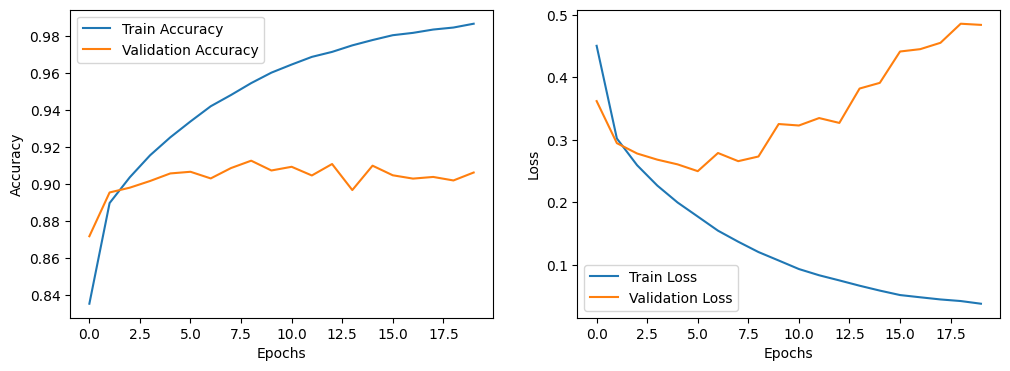

313/313 [==============================] - 14s 43ms/step


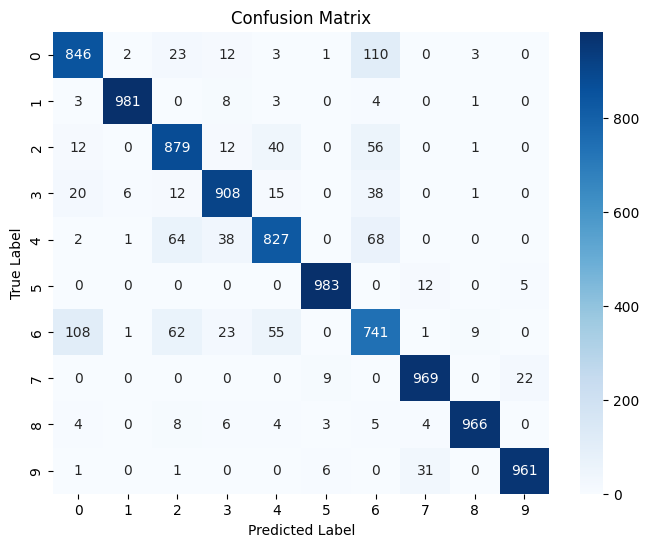

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    return (x_train, y_train), (x_test, y_test)

def create_model(filter_size=32, kernel_size=(3,3), reg=None, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(filter_size, kernel_size, activation='relu', input_shape=(28,28,1), kernel_regularizer=reg),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filter_size * 2, kernel_size, activation='relu', kernel_regularizer=reg),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(filter_size=32, kernel_size=(3,3), reg=None, batch_size=32, optimizer='adam', epochs=20):
    (x_train, y_train), (x_test, y_test) = load_data()
    model = create_model(filter_size, kernel_size, reg, optimizer)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    return model, history, (x_test, y_test)

def plot_performance(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_confusion_matrix(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


model1, history1, (x_test1, y_test1) = train_and_evaluate(filter_size=32, kernel_size=(3,3), reg=None, batch_size=32, optimizer='adam', epochs=20)
plot_performance(history1)
plot_confusion_matrix(model1, x_test1, y_test1)


     